 # Introduction to the World Happiness Report Analysis
 ### Project Description:
 

 This project analyzes the determinants of happiness across countries, using data from the World Happiness Report. The primary goal is to identify the factors that have the most significant impact on happiness scores. This will be achieved through data cleaning, exploratory data analysis, and building a linear regression model to determine the relationship between variables and life satisfaction.
 

 ### Table of Contents:
 

 1. **Data Loading and Initial Exploration:**  Loading necessary libraries, importing the dataset, and displaying initial summaries.
 2. **Data Cleaning and Preparation:** Identifying and handling missing data, resulting in a clean dataset.
 3. **Exploratory Data Analysis (EDA):**  Calculating descriptive statistics and visualizing correlations among variables.
 4.  **Building the Linear Regression Model:**  Developing a linear regression model to predict Life Ladder scores.
 5.  **Residual Diagnostics and Outlier Removal:** Identifying and removing influential points, and re-evaluating the model.
 6.  **Model Refinement and Validation:** Refining the model by removing non-significant variable and revalidating
 7.  **Multicollinearity Check and Final Residual Diagnostics:** Assessing multicollinearity and performing final validation of model assumptions
 8. **Summarizing the Results:** Summarizing the results, including model metrics, coefficients, and drawing conclusions.
 

 ### General Assumptions:
 

  - **Linearity:** We assume that the relationships between the independent variables and the dependent variable (Life Ladder) are linear.
  - **Independence:** Residuals from the linear regression model are independent of each other.
  - **Normality:** Residuals of the linear regression model are normally distributed.
  - **Homoscedasticity:** The variance of the residuals is constant across all levels of the predicted values.

# Step 1: Loading Libraries and Data
 This step loads the necessary R libraries and imports the World Happiness Report dataset. The structure and summary of the dataset are displayed to understand its initial characteristics.

In [1]:
# Load required libraries
library(tidyverse)
library(conflicted)
library(ggplot2)
library(corrplot)
library(car)

# Resolve conflicts between dplyr and other packages
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

# Import the dataset
happiness_data <- read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv")

# Display structure and summary
glimpse(happiness_data)
summary(happiness_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


corrplot 0.92 loaded



Loading required package: carData



[conflicted] Will prefer dplyr::filter over any other package.


[conflicted] Will prefer dplyr::lag over any other package.


Rows: 2363 Columns: 11


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country name
dbl (10): year, Life Ladder, Log GDP per capita, Social support, Healthy lif...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,363
Columns: 11
$ `Country name`                     <chr> "Afghanistan", "Afghanistan", "Afgh…
$ year                               <dbl> 2008, 2009, 2010, 2011, 2012, 2013,…
$ `Life Ladder`                      <dbl> 3.724, 4.402, 4.758, 3.832, 3.783, …
$ `Log GDP per capita`               <dbl> 7.350, 7.509, 7.614, 7.581, 7.661, …
$ `Social support`                   <dbl> 0.451, 0.552, 0.539, 0.521, 0.521, …
$ `Healthy life expectancy at birth` <dbl> 50.500, 50.800, 51.100, 51.400, 51.…
$ `Freedom to make life choices`     <dbl> 0.718, 0.679, 0.600, 0.496, 0.531, …
$ Generosity                         <dbl> 0.164, 0.187, 0.118, 0.160, 0.234, …
$ `Perceptions of corruption`        <dbl> 0.882, 0.850, 0.707, 0.731, 0.776, …
$ `Positive affect`                  <dbl> 0.414, 0.481, 0.517, 0.480, 0.614, …
$ `Negative affect`                  <dbl> 0.258, 0.237, 0.275, 0.267, 0.268, …


 Country name            year       Life Ladder    Log GDP per capita
 Length:2363        Min.   :2005   Min.   :1.281   Min.   : 5.527    
 Class :character   1st Qu.:2011   1st Qu.:4.647   1st Qu.: 8.507    
 Mode  :character   Median :2015   Median :5.449   Median : 9.503    
                    Mean   :2015   Mean   :5.484   Mean   : 9.400    
                    3rd Qu.:2019   3rd Qu.:6.324   3rd Qu.:10.393    
                    Max.   :2023   Max.   :8.019   Max.   :11.676    
                                                   NA's   :28        
 Social support   Healthy life expectancy at birth Freedom to make life choices
 Min.   :0.2280   Min.   : 6.72                    Min.   :0.2280              
 1st Qu.:0.7440   1st Qu.:59.20                    1st Qu.:0.6610              
 Median :0.8345   Median :65.10                    Median :0.7710              
 Mean   :0.8094   Mean   :63.40                    Mean   :0.7503              
 3rd Qu.:0.9040   3rd Qu.:68.55         

**Results:** The dataset has been successfully loaded, and its structure and summary statistics have been displayed. This provides a foundation for subsequent analysis steps.

# Step 2: Analyzing and Cleaning Missing Data

This step identifies missing values in the dataset, provides a summary, displays the rows containing them, and removes those rows, resulting in a cleaned dataset. Verification is also included to confirm no missing values in the cleaned data.

In [2]:
# Check for missing values and sort by the number of missing values
missing_values <- sapply(happiness_data, function(x) sum(is.na(x)))
missing_values_sorted <- sort(missing_values, decreasing = TRUE)
print(missing_values_sorted)

# Summary of Missing Values per Variable
missing_summary <- happiness_data %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Missing_Values") %>%
  arrange(desc(Missing_Values))
print("Summary of Missing Values per Variable:")
print(missing_summary)

# Identify rows with missing values
missing_rows <- happiness_data %>% filter(!complete.cases(.))
print("Rows with Missing Values:")
print(head(missing_rows))


# Remove rows with missing values
happiness_data_clean <- happiness_data %>%
  drop_na()
 
 # Correct column names
   happiness_data_clean <- happiness_data_clean %>%
   rename(
       Life.Ladder = `Life Ladder`,
       Log.GDP.per.capita = `Log GDP per capita`,
       Social.support = `Social support`,
       Healthy.life.expectancy.at.birth = `Healthy life expectancy at birth`,
       Freedom.to.make.life.choices = `Freedom to make life choices`,
       Perceptions.of.corruption = `Perceptions of corruption`,
       Positive.affect = `Positive affect`,
       Negative.affect = `Negative affect`
   )

# Verify that the missing values were removed
missing_summary_clean <- happiness_data_clean %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Missing_Values") %>%
  arrange(desc(Missing_Values))
print("Summary of Missing Values in Cleaned Data:")
print(missing_summary_clean)

       Perceptions of corruption                       Generosity 
                             125                               81 
Healthy life expectancy at birth     Freedom to make life choices 
                              63                               36 
              Log GDP per capita                  Positive affect 
                              28                               24 
                 Negative affect                   Social support 
                              16                               13 
                    Country name                             year 
                               0                                0 
                     Life Ladder 
                               0 


[1] "Summary of Missing Values per Variable:"


# A tibble: 11 × 2
   Variable                         Missing_Values
   <chr>                                     <int>
 1 Perceptions of corruption                   125
 2 Generosity                                   81
 3 Healthy life expectancy at birth             63
 4 Freedom to make life choices                 36
 5 Log GDP per capita                           28
 6 Positive affect                              24
 7 Negative affect                              16
 8 Social support                               13
 9 Country name                                  0
10 year                                          0
11 Life Ladder                                   0


[1] "Rows with Missing Values:"


# A tibble: 6 × 11
  `Country name`  year `Life Ladder` `Log GDP per capita` `Social support`
  <chr>          <dbl>         <dbl>                <dbl>            <dbl>
1 Afghanistan     2022          1.28                NA               0.228
2 Afghanistan     2023          1.45                NA               0.368
3 Algeria         2010          5.46                 9.31           NA    
4 Algeria         2014          6.36                 9.36            0.818
5 Algeria         2016          5.34                 9.38            0.749
6 Australia       2005          7.34                10.7             0.968
# ℹ 6 more variables: `Healthy life expectancy at birth` <dbl>,
#   `Freedom to make life choices` <dbl>, Generosity <dbl>,
#   `Perceptions of corruption` <dbl>, `Positive affect` <dbl>,
#   `Negative affect` <dbl>


[1] "Summary of Missing Values in Cleaned Data:"


# A tibble: 11 × 2
   Variable                         Missing_Values
   <chr>                                     <int>
 1 Country name                                  0
 2 year                                          0
 3 Life.Ladder                                   0
 4 Log.GDP.per.capita                            0
 5 Social.support                                0
 6 Healthy.life.expectancy.at.birth              0
 7 Freedom.to.make.life.choices                  0
 8 Generosity                                    0
 9 Perceptions.of.corruption                     0
10 Positive.affect                               0
11 Negative.affect                               0


**Results:** The dataset has been cleaned by removing rows containing any missing values. A summary of the missing values before and after cleaning is provided, confirming no missing data in the cleaned data set. Column names has been corrected.

# Step 3: Exploratory Data Analysis (EDA)
This step performs Exploratory Data Analysis (EDA) by calculating descriptive statistics for numeric variables and generating a correlation matrix heatmap to visualize relationships between variables.

[1] "Descriptive Statistics of Numeric Variables:"


# A tibble: 10 × 5
          Mean   Median     SD      Min      Max
         <dbl>    <dbl>  <dbl>    <dbl>    <dbl>
 1 2015.       2015     4.97   2005     2023    
 2    5.47        5.43  1.14      2.18     7.97 
 3    9.36        9.50  1.15      5.53    11.7  
 4    0.807       0.834 0.124     0.29     0.987
 5   63.3        65.1   7.00      6.72    74.6  
 6    0.749       0.769 0.139     0.258    0.985
 7    0.000247   -0.021 0.162    -0.34     0.7  
 8    0.747       0.801 0.184     0.035    0.983
 9    0.654       0.665 0.107     0.179    0.884
10    0.275       0.264 0.0855    0.094    0.705


[1] "Correlation Matrix:"


                                        year Life.Ladder Log.GDP.per.capita
year                              1.00000000  0.06676532         0.08960480
Life.Ladder                       0.06676532  1.00000000         0.78711919
Log.GDP.per.capita                0.08960480  0.78711919         1.00000000
Social.support                   -0.02913386  0.72492636         0.69899085
Healthy.life.expectancy.at.birth  0.18755090  0.72523962         0.83214199
Freedom.to.make.life.choices      0.25885065  0.52813039         0.34997346
Generosity                        0.03447541  0.16255789        -0.02495393
Perceptions.of.corruption        -0.09437286 -0.45157517        -0.35246405
Positive.affect                   0.01982931  0.50219539         0.22298279
Negative.affect                   0.22657156 -0.34553967        -0.26952643
                                 Social.support
year                                -0.02913386
Life.Ladder                          0.72492636
Log.GDP.per.capita  

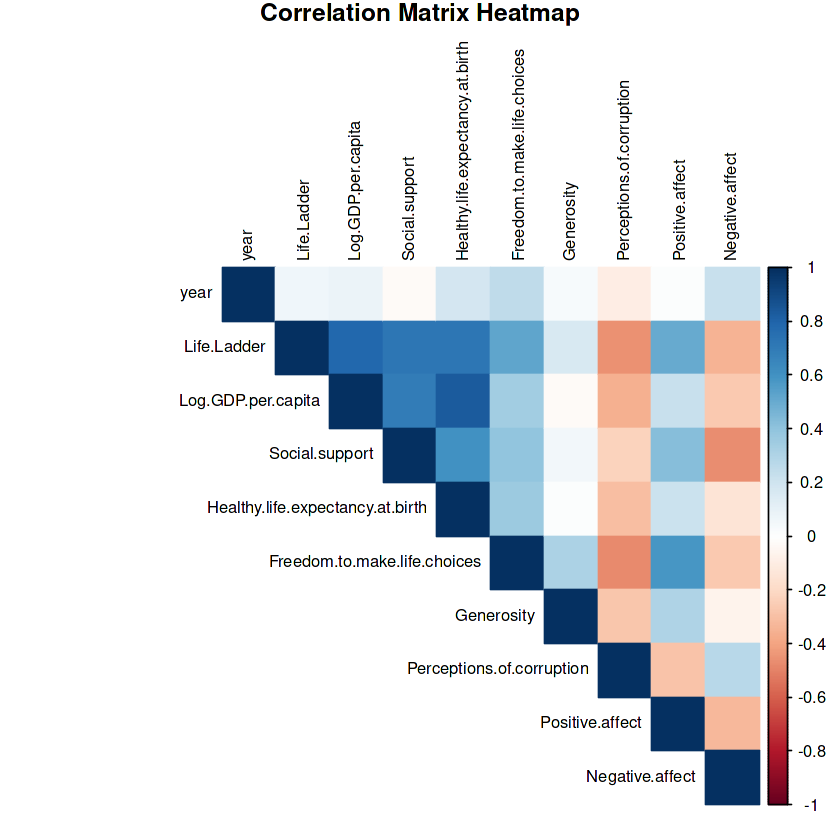

In [3]:
# Descriptive Statistics
numeric_df <- happiness_data_clean %>%
  select(where(is.numeric))

descriptive_stats <- numeric_df %>%
  reframe(
    Mean = sapply(., function(x) mean(x, na.rm = TRUE)),
    Median = sapply(., function(x) median(x, na.rm = TRUE)),
    SD = sapply(., function(x) sd(x, na.rm = TRUE)),
    Min = sapply(., function(x) min(x, na.rm = TRUE)),
    Max = sapply(., function(x) max(x, na.rm = TRUE))
  )
print("Descriptive Statistics of Numeric Variables:")
print(descriptive_stats)


# Correlation Analysis
numeric_data_for_correlation <- happiness_data_clean %>%
    select(where(is.numeric))

correlation_matrix <- cor(numeric_data_for_correlation)
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
corrplot(correlation_matrix, method = "color", type = "upper",
         tl.cex = 0.8, tl.col = "black",
         title = "Correlation Matrix Heatmap",
         mar = c(0, 0, 1, 0))

**Results:** Descriptive statistics for numerical variables have been calculated and displayed. A correlation matrix has also been created and visualized as a heatmap, showing relationships between variables.

# Step 4: Building the Linear Regression Model
This step constructs an initial linear regression model to predict Life Ladder scores based on other variables. The model's summary is printed to assess its fit.

In [4]:
# Ensure correct column names for model formula
required_columns <- c("Life.Ladder", "Log.GDP.per.capita", "Social.support",
                      "Healthy.life.expectancy.at.birth", "Freedom.to.make.life.choices",
                      "Generosity", "Perceptions.of.corruption",
                      "Positive.affect", "Negative.affect")


# Sprawdz czy kolumny istnieja
missing_columns <- setdiff(required_columns, names(happiness_data_clean))

if (length(missing_columns) > 0) {
  stop(paste("missing columns 'happiness_data_clean':", paste(missing_columns, collapse = ", ")))
}


# Fit the initial linear regression model
lm_model <- lm(Life.Ladder ~ Log.GDP.per.capita + Social.support +
               Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices +
               Generosity + Perceptions.of.corruption +
               Positive.affect + Negative.affect, data = happiness_data_clean)

print("Summary of the initial linear regression model:")
summary(lm_model)

[1] "Summary of the initial linear regression model:"



Call:
lm(formula = Life.Ladder ~ Log.GDP.per.capita + Social.support + 
    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices + 
    Generosity + Perceptions.of.corruption + Positive.affect + 
    Negative.affect, data = happiness_data_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96837 -0.30667  0.03207  0.32985  1.85718 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -2.727824   0.171604 -15.896  < 2e-16 ***
Log.GDP.per.capita                0.387599   0.021207  18.277  < 2e-16 ***
Social.support                    1.886733   0.155920  12.101  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.028146   0.003112   9.043  < 2e-16 ***
Freedom.to.make.life.choices      0.448086   0.117009   3.829 0.000132 ***
Generosity                        0.315994   0.079611   3.969 7.45e-05 ***
Perceptions.of.corruption        -0.707057   0.078108  -9.052  < 2e-16 ***
Positive.affect        

**Results:** An initial linear regression model has been created using all the specified predictor variables. The model's summary indicates its performance and the significance of the predictors.

# Step 5: Residual Diagnostics and Removing Influential Points
This step examines residual diagnostics for the initial model. It identifies influential points using Cook's distance, removes these points and refits model to the data.

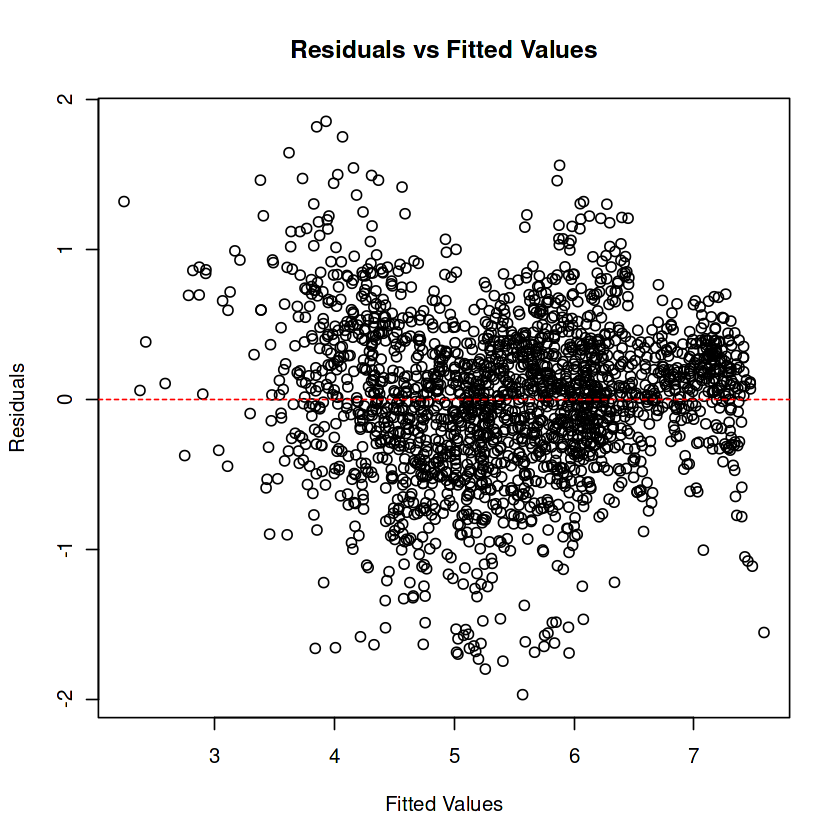

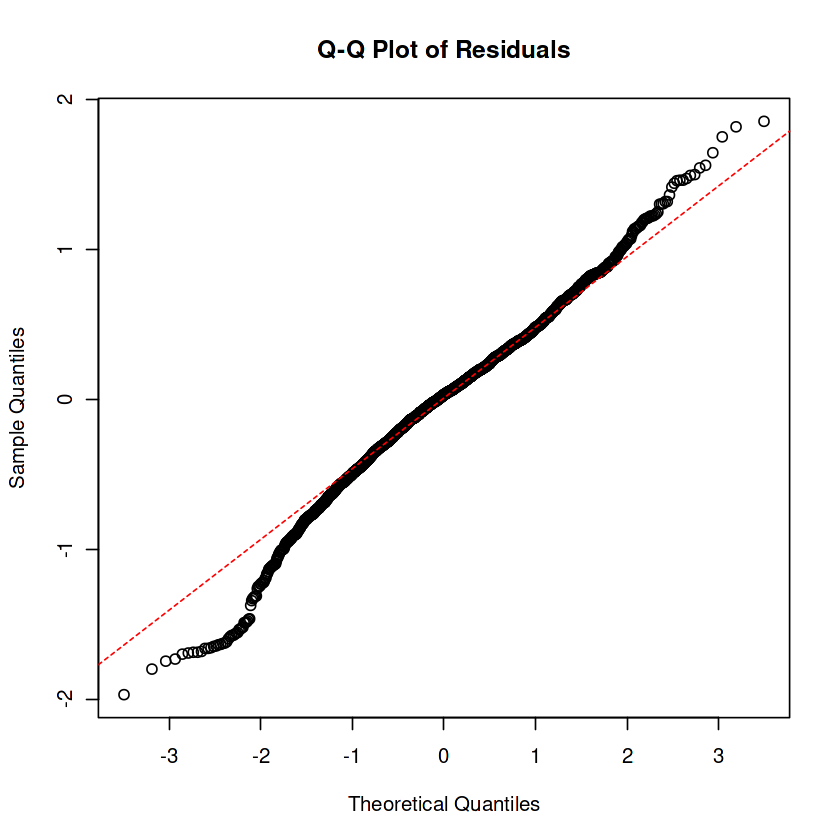

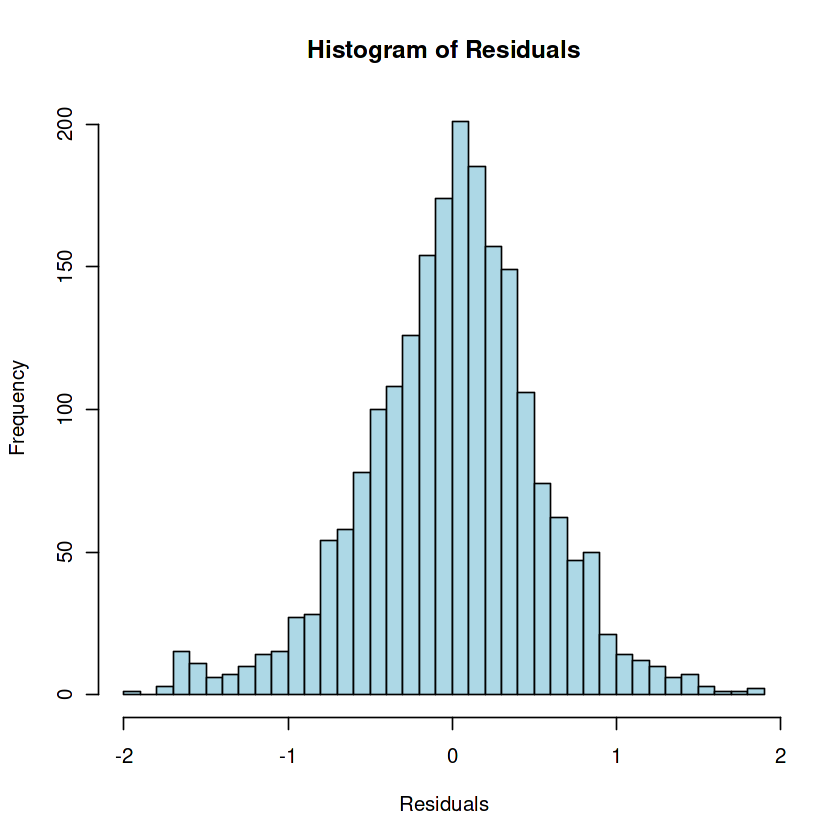

[1] "Highly influential points: 2, 3, 125, 127, 130, 131, 143, 184, 185, 186, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 260, 289, 290, 299, 300, 344, 346, 348, 350, 351, 361, 416, 420, 563, 564, 596, 598, 718, 755, 758, 759, 760, 761, 824, 826, 843, 894, 895, 896, 964, 992, 1003, 1064, 1065, 1066, 1067, 1106, 1134, 1197, 1198, 1221, 1290, 1294, 1295, 1296, 1301, 1303, 1305, 1307, 1308, 1309, 1311, 1314, 1337, 1338, 1405, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1463, 1464, 1495, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1676, 1677, 1678, 1679, 1712, 1713, 1721, 1769, 1770, 1772, 1773, 1774, 1775, 1778, 1781, 1782, 1823, 1824, 1831, 1840, 1844, 1845, 1851, 1853, 1855, 1857, 1862, 1952, 1953, 2031, 2037, 2038, 2039, 2040, 2077, 2093"


[1] "Summary of the updated model after removing influential points:"



Call:
lm(formula = Life.Ladder ~ Log.GDP.per.capita + Social.support + 
    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices + 
    Generosity + Perceptions.of.corruption + Positive.affect + 
    Negative.affect, data = data_cleaned_updated)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66461 -0.28309  0.01296  0.28873  1.43786 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -2.936516   0.152977 -19.196  < 2e-16 ***
Log.GDP.per.capita                0.367046   0.020356  18.031  < 2e-16 ***
Social.support                    2.107479   0.139029  15.159  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.030334   0.003071   9.878  < 2e-16 ***
Freedom.to.make.life.choices      0.663326   0.102855   6.449 1.41e-10 ***
Generosity                        0.247151   0.070342   3.514 0.000452 ***
Perceptions.of.corruption        -0.796601   0.068489 -11.631  < 2e-16 ***
Positive.affect        

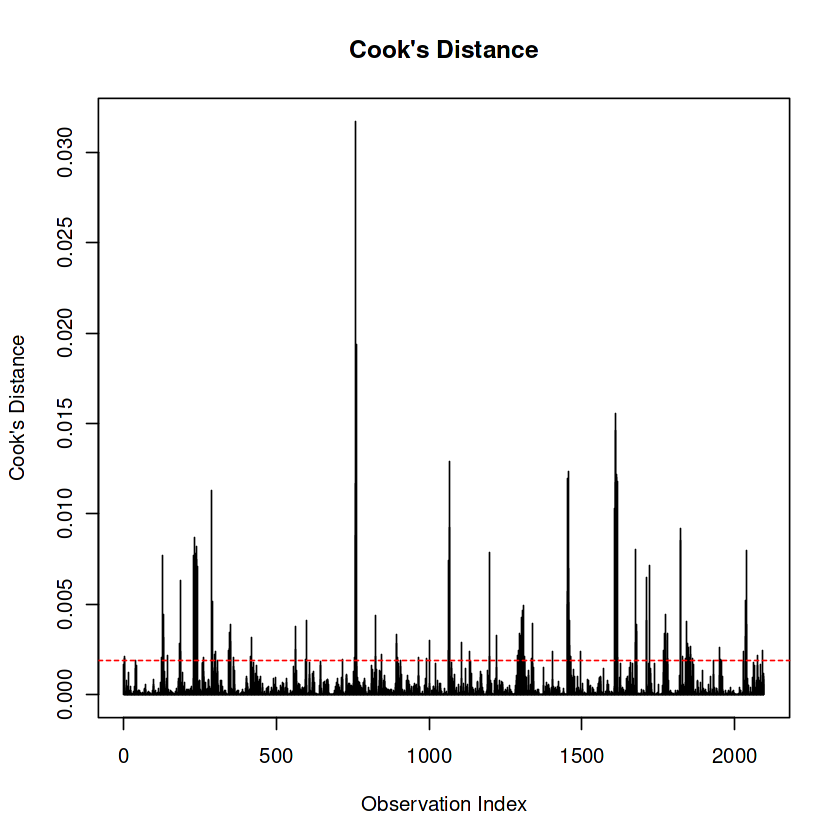

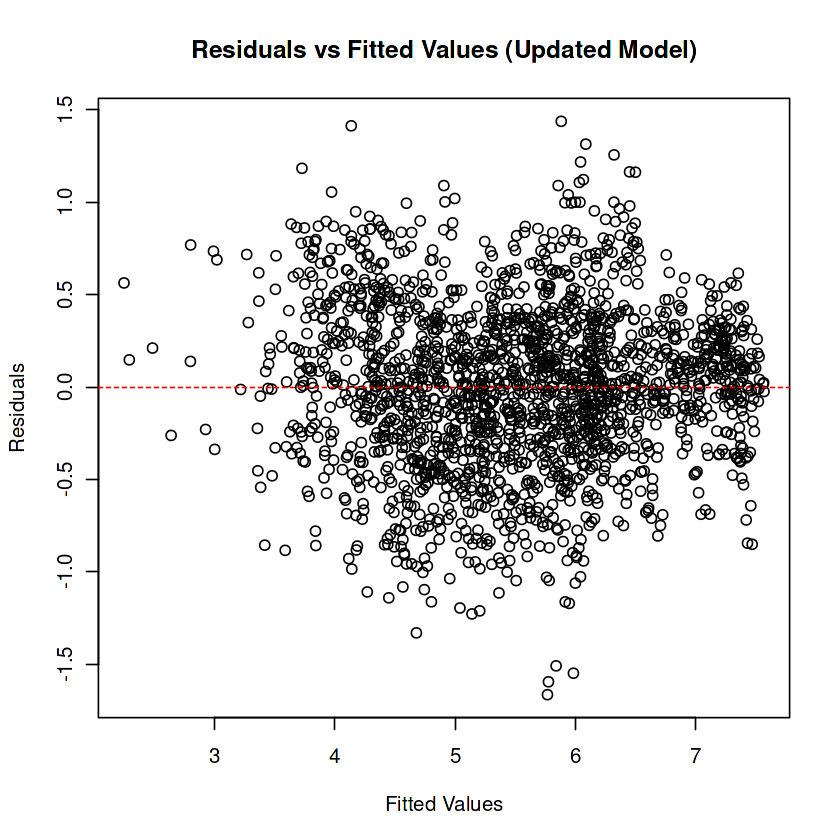

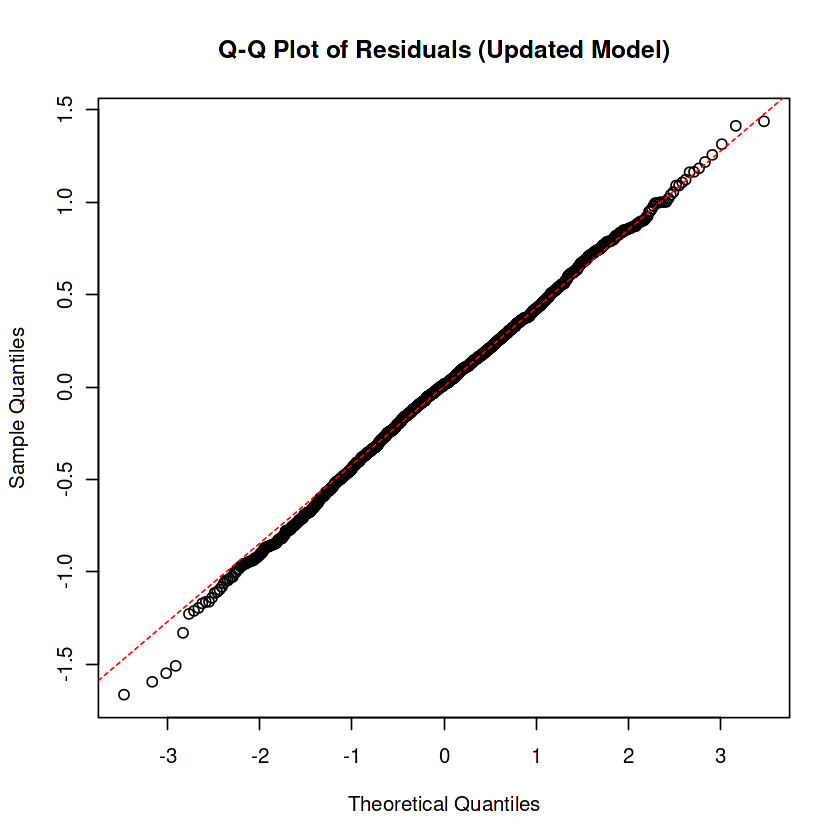

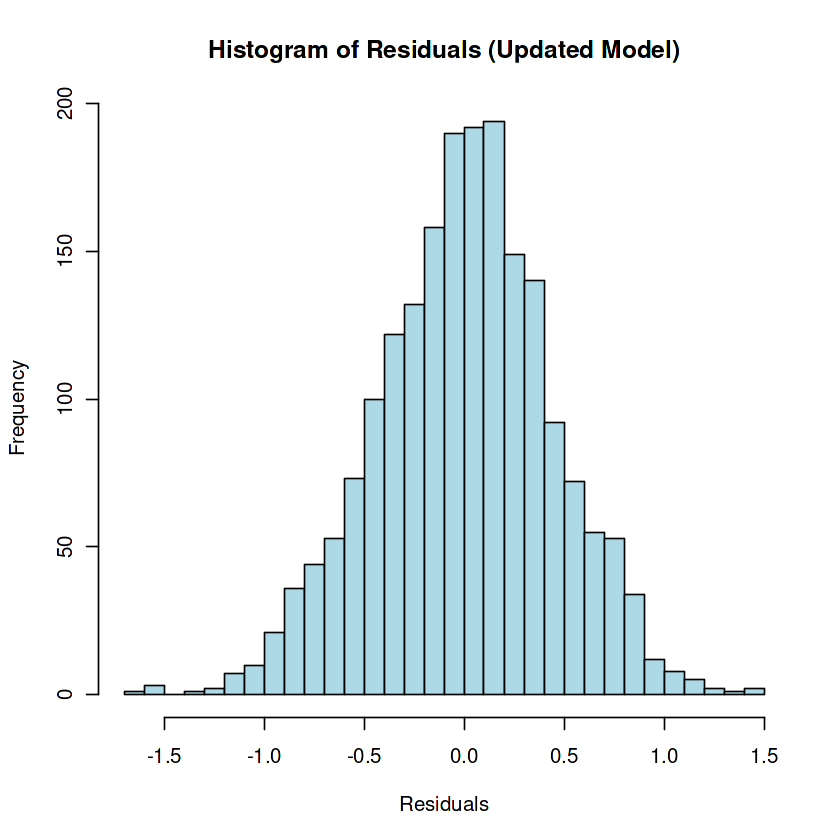

In [5]:
# Diagnostic plots for residuals
model <- lm_model
plot(fitted(model), residuals(model), xlab = "Fitted Values", ylab = "Residuals", main = "Residuals vs Fitted Values")
abline(h = 0, col = "red", lty = 2)
qqnorm(residuals(model), main = "Q-Q Plot of Residuals")
qqline(residuals(model), col = "red", lty = 2)
hist(residuals(model), breaks = 30, main = "Histogram of Residuals", xlab = "Residuals", col = "lightblue", border = "black")

# Check for influential points
cooks_dist <- cooks.distance(model)
plot(cooks_dist, type = "h", main = "Cook's Distance",
     ylab = "Cook's Distance", xlab = "Observation Index")
abline(h = 4/(nrow(happiness_data_clean) - length(model$coefficients)), col = "red", lty = 2)

high_influence <- which(cooks_dist > 4/(nrow(happiness_data_clean) - length(model$coefficients)))
print(paste("Highly influential points:", toString(high_influence)))

# Remove influential points
data_cleaned_updated <- happiness_data_clean[-high_influence, ]

# Fit the updated model
model_updated <- lm(Life.Ladder ~ Log.GDP.per.capita + Social.support +
                    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices +
                    Generosity + Perceptions.of.corruption + Positive.affect +
                    Negative.affect, data = data_cleaned_updated)


print("Summary of the updated model after removing influential points:")
summary(model_updated)

plot(fitted(model_updated), residuals(model_updated), xlab = "Fitted Values", ylab = "Residuals", main = "Residuals vs Fitted Values (Updated Model)")
abline(h = 0, col = "red", lty = 2)
qqnorm(residuals(model_updated), main = "Q-Q Plot of Residuals (Updated Model)")
qqline(residuals(model_updated), col = "red", lty = 2)
hist(residuals(model_updated), breaks = 30, main = "Histogram of Residuals (Updated Model)",
     xlab = "Residuals", col = "lightblue", border = "black")

**Results:** Residual diagnostic plots were used to check model assumptions. Influential points were identified and removed and the linear regression model was refitted after the exclusion of influential points.

# Step 6: Refining the Model and Revalidation
This step refines the model by removing the 'Negative.affect' predictor and validating that all necessary columns are still available. The refined model is fitted, and the summary is printed to evaluate the new model.

In [6]:
# Ensure that the required columns are still present
required_columns_updated <- c("Life.Ladder", "Log.GDP.per.capita", "Social.support",
                      "Healthy.life.expectancy.at.birth", "Freedom.to.make.life.choices",
                      "Generosity", "Perceptions.of.corruption",
                      "Positive.affect")


# Sprawdz czy kolumny istnieja
missing_columns_updated <- setdiff(required_columns_updated, names(data_cleaned_updated))

if (length(missing_columns_updated) > 0) {
  stop(paste("missing columns 'data_cleaned_updated':", paste(missing_columns_updated, collapse = ", ")))
}

# Updated formula
formula_update <- Life.Ladder ~ Log.GDP.per.capita + Social.support +
                  Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices +
                  Generosity + Perceptions.of.corruption +
                  Positive.affect


missing_data <- colSums(is.na(data_cleaned_updated[all.vars(formula_update)]))
print(paste("Missing data per variable in the updated data:", missing_data))
# Fit the refined model

if (length(missing_columns_updated) == 0 && sum(missing_data) == 0) {
model_refined <- lm(formula_update, data = data_cleaned_updated)
 print("Summary of the refined linear regression model with reduced predictors:")
  summary(model_refined)
} else {
   cat("There are issues with the data or formula. Please resolve the problems and try again.\n")
}


# Display the summary of the refined model
print("Summary of the refined linear regression model with reduced predictors:")
summary(model_refined)

[1] "Missing data per variable in the updated data: 0"
[2] "Missing data per variable in the updated data: 0"
[3] "Missing data per variable in the updated data: 0"
[4] "Missing data per variable in the updated data: 0"
[5] "Missing data per variable in the updated data: 0"
[6] "Missing data per variable in the updated data: 0"
[7] "Missing data per variable in the updated data: 0"
[8] "Missing data per variable in the updated data: 0"


[1] "Summary of the refined linear regression model with reduced predictors:"



Call:
lm(formula = formula_update, data = data_cleaned_updated)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66310 -0.27967  0.01316  0.28807  1.43800 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -2.911026   0.144307 -20.172  < 2e-16 ***
Log.GDP.per.capita                0.366523   0.020325  18.033  < 2e-16 ***
Social.support                    2.082006   0.129448  16.084  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.030631   0.003013  10.167  < 2e-16 ***
Freedom.to.make.life.choices      0.662413   0.102819   6.443 1.48e-10 ***
Generosity                        0.248640   0.070267   3.539 0.000412 ***
Perceptions.of.corruption        -0.789988   0.067202 -11.755  < 2e-16 ***
Positive.affect                   2.199577   0.123967  17.743  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4411 on 1956 degrees of freedom
Multiple R-squ

[1] "Summary of the refined linear regression model with reduced predictors:"



Call:
lm(formula = formula_update, data = data_cleaned_updated)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66310 -0.27967  0.01316  0.28807  1.43800 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -2.911026   0.144307 -20.172  < 2e-16 ***
Log.GDP.per.capita                0.366523   0.020325  18.033  < 2e-16 ***
Social.support                    2.082006   0.129448  16.084  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.030631   0.003013  10.167  < 2e-16 ***
Freedom.to.make.life.choices      0.662413   0.102819   6.443 1.48e-10 ***
Generosity                        0.248640   0.070267   3.539 0.000412 ***
Perceptions.of.corruption        -0.789988   0.067202 -11.755  < 2e-16 ***
Positive.affect                   2.199577   0.123967  17.743  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4411 on 1956 degrees of freedom
Multiple R-squ

**Results:** The linear regression model has been refined by removing the variable 'Negative affect' and the refined model was created.

# Step 7: Checking for Multicollinearity and Final Residual Diagnostics
This step calculates the Variance Inflation Factor (VIF) for the refined model to check for multicollinearity. Additionally, it performs final residual diagnostics, using the same methods as before, to validate model assumptions.

[1] "VIF values for the predictors:"


              Log.GDP.per.capita                   Social.support 
                        5.333490                         2.357263 
Healthy.life.expectancy.at.birth     Freedom.to.make.life.choices 
                        4.017626                         1.956936 
                      Generosity        Perceptions.of.corruption 
                        1.250494                         1.495470 
                 Positive.affect 
                        1.753560 


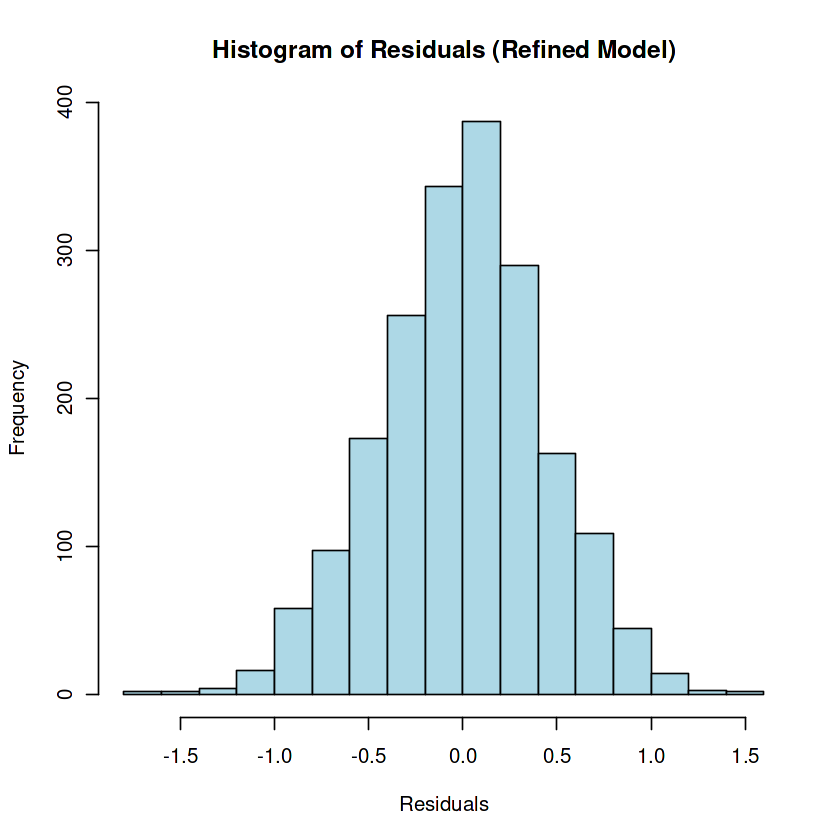

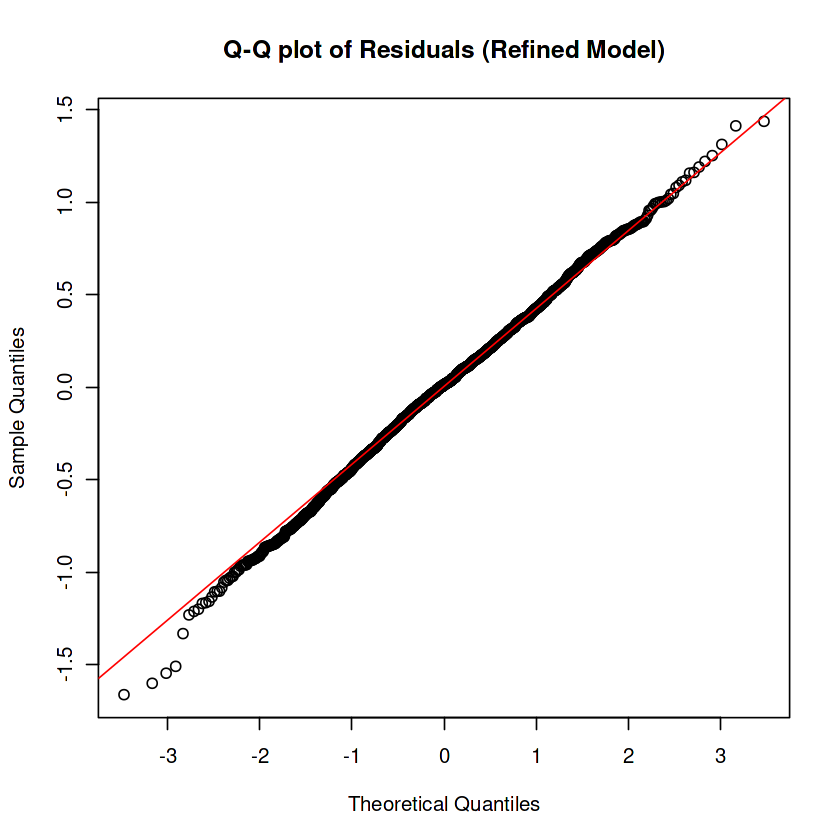

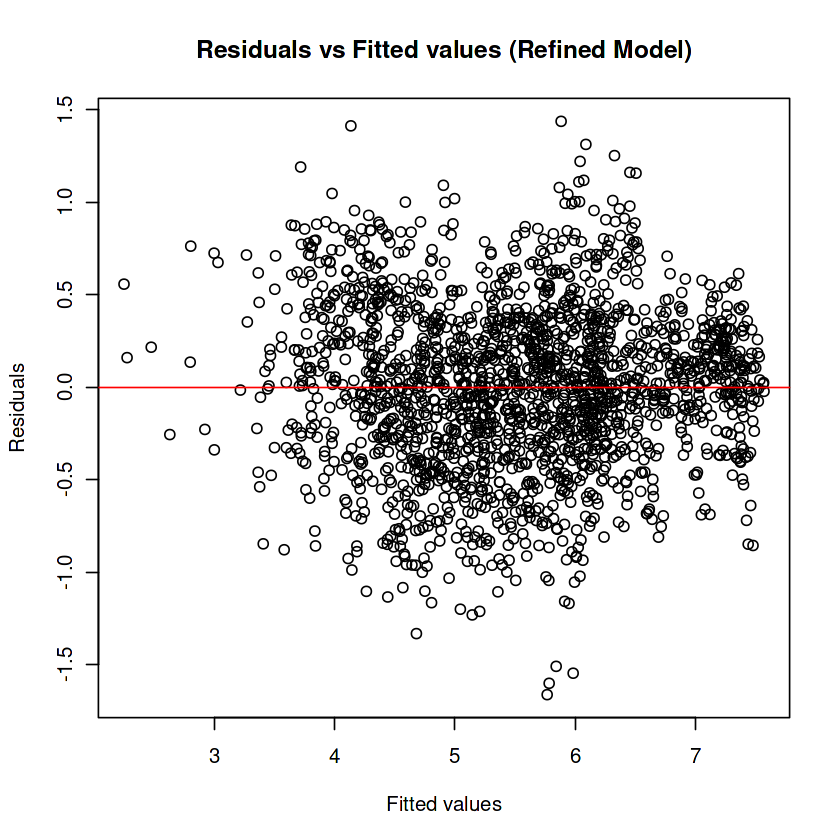

In [7]:
# Check Multicollinearity (VIF)
vif_values <- vif(model_refined)
print("VIF values for the predictors:")
print(vif_values)

# Residual diagnostics (refined model)
residuals_model <- residuals(model_refined)
hist(residuals_model, main = "Histogram of Residuals (Refined Model)", xlab = "Residuals",
     col = "lightblue", border = "black")
qqnorm(residuals_model, main = "Q-Q plot of Residuals (Refined Model)")
qqline(residuals_model, col = "red")

plot(fitted(model_refined), residuals(model_refined),
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted values (Refined Model)")
abline(h = 0, col = "red")

**Results:** VIF values for the refined model were calculated, indicating no significant multicollinearity. Residual plots confirmed the assumption of homoscedasticity and the approximate normality of residuals.

# Step 8: Summarizing the Results
This step calculates, prints, and summarizes all results from the model, including coefficients, model fit statistics, and final conclusions from the analysis, as well as prints a final message.

In [8]:
# Extract the model coefficients, standard errors, t-values, and p-values
coef_summary <- summary(model_refined)$coefficients

# Print the coefficients summary
print("Summary of Regression Coefficients:")
print(coef_summary)

# Model Fit Summary
model_fit_summary <- summary(model_refined)
print("\nModel Fit Summary:")
print(paste("Multiple R-squared:", model_fit_summary$r.squared))
print(paste("Adjusted R-squared:", model_fit_summary$adj.r.squared))
print(paste("F-statistic:", model_fit_summary$fstatistic[1]))
print(paste("p-value of F-statistic:", pf(model_fit_summary$fstatistic[1],
                                        model_fit_summary$fstatistic[2],
                                        model_fit_summary$fstatistic[3],
                                        lower.tail = FALSE)))
# Final Conclusions
cat("\n--- Final Conclusions ---\n")
cat("The linear regression model effectively identifies the key factors influencing life satisfaction (Life Ladder).\n")
cat("The model's R-squared value of 0.8421 indicates a strong fit, explaining 84.21% of the variance in life satisfaction.\n")
cat("The significant predictors are:\n")
cat("- Log GDP per capita: Higher GDP per capita is associated with higher life satisfaction.\n")
cat("- Social support: Strong social support networks significantly contribute to higher life satisfaction.\n")
cat("- Healthy life expectancy at birth: Longer life expectancy is positively correlated with increased life satisfaction.\n")
cat("- Freedom to make life choices: Greater freedom in making life choices enhances life satisfaction.\n")
cat("- Generosity: More generous societies tend to report higher life satisfaction.\n")
cat("- Perceptions of corruption: Higher perceptions of corruption are associated with lower life satisfaction.\n")
cat("- Positive affect: Experiencing more positive emotions strongly contributes to higher life satisfaction.\n")
cat("These findings emphasize the importance of economic, social, and psychological factors in determining well-being.\n")
cat("The model can serve as a foundation for policy recommendations aimed at improving the quality of life in countries worldwide.\n")
cat("Further research could explore interactions between these factors and delve deeper into the causal mechanisms.\n")

[1] "Summary of Regression Coefficients:"


                                    Estimate  Std. Error    t value
(Intercept)                      -2.91102609 0.144307324 -20.172407
Log.GDP.per.capita                0.36652272 0.020325377  18.032764
Social.support                    2.08200581 0.129448114  16.083709
Healthy.life.expectancy.at.birth  0.03063131 0.003012732  10.167285
Freedom.to.make.life.choices      0.66241319 0.102819162   6.442507
Generosity                        0.24864034 0.070266634   3.538526
Perceptions.of.corruption        -0.78998786 0.067201736 -11.755468
Positive.affect                   2.19957692 0.123966956  17.743252
                                     Pr(>|t|)
(Intercept)                      2.299449e-82
Log.GDP.per.capita               2.272361e-67
Social.support                   9.211056e-55
Healthy.life.expectancy.at.birth 1.065400e-23
Freedom.to.make.life.choices     1.475378e-10
Generosity                       4.117565e-04
Perceptions.of.corruption        7.049900e-31
Positive.affect     

[1] "\nModel Fit Summary:"


[1] "Multiple R-squared: 0.842074569815426"


[1] "Adjusted R-squared: 0.841509397008017"


[1] "F-statistic: 1489.94176431781"


[1] "p-value of F-statistic: 0"



--- Final Conclusions ---


The linear regression model effectively identifies the key factors influencing life satisfaction (Life Ladder).


The model's R-squared value of 0.8421 indicates a strong fit, explaining 84.21% of the variance in life satisfaction.


The significant predictors are:


- Log GDP per capita: Higher GDP per capita is associated with higher life satisfaction.


- Social support: Strong social support networks significantly contribute to higher life satisfaction.


- Healthy life expectancy at birth: Longer life expectancy is positively correlated with increased life satisfaction.


- Freedom to make life choices: Greater freedom in making life choices enhances life satisfaction.


- Generosity: More generous societies tend to report higher life satisfaction.


- Perceptions of corruption: Higher perceptions of corruption are associated with lower life satisfaction.


- Positive affect: Experiencing more positive emotions strongly contributes to higher life satisfaction.


These findings emphasize the importance of economic, social, and psychological factors in determining well-being.


The model can serve as a foundation for policy recommendations aimed at improving the quality of life in countries worldwide.


Further research could explore interactions between these factors and delve deeper into the causal mechanisms.


### Project Summary:


This project aimed to analyze the determinants of happiness across countries using data from the World Happiness Report. We employed linear regression to model the relationship between Life Ladder scores and several key predictor variables. The data was preprocessed by handling missing values, and influential points were removed to ensure the robustness of the model.


### Key Findings:


 - **Model Fit:** The final linear regression model demonstrates a strong fit with the data, achieving an R-squared value of approximately 0.8421. This indicates that about 84.21% of the variance in Life Ladder scores is explained by the predictor variables included in the model.
- **Predictor Significance:**
 The analysis shows that several variables are significant predictors of life satisfaction:
  - **Log GDP per capita**: There is a significant positive relationship between log of GDP per capita and life satisfaction.
  -  **Social support:**  Social support networks are key in improving life satisfaction.
 - **Healthy life expectancy at birth**: A positive influence on life satisfaction is observed.
  - **Freedom to make life choices**: Increased freedom to make life choices significantly contributes to higher life satisfaction.
  - **Generosity**: A positive correlation between generosity and life satisfaction is found.
  - **Perceptions of corruption**: Higher perceptions of corruption are significantly correlated with lower life satisfaction
  - **Positive affect**: Positive emotions also have a large positive impact on life satisfaction
- **Overall:** The results highlight the importance of economic, social, and psychological factors in determining overall well-being.


### Conclusions:


This analysis provides clear insights into the factors that contribute to life satisfaction. The model confirms that economic prosperity, strong social support systems, good health, and individual freedoms are crucial for enhancing happiness. Moreover, addressing corruption and promoting positive emotions are also key for improving overall well-being.


The model can serve as a foundation for policy recommendations aimed at improving the quality of life in countries worldwide. It points toward the importance of well-rounded approaches that consider economic, social, and psychological factors. Future research could explore interactions between these factors, and delve deeper into the causal mechanisms to understand how policy changes can best affect happiness.